<a href="https://colab.research.google.com/github/SaloniJhalani/Motive-Driver-App-Reviews-Sentiment-Analysis/blob/main/Motive_Driver_App_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> Import Libraries </h2>



In [ ]:
!pip install google-play-scraper
!pip install app-store-scraper
!pip install textblob
!pip install vaderSentiment
!pip install wordcloud

In [4]:
#Import Libraries
from google_play_scraper import app,Sort,reviews_all
from app_store_scraper import AppStore
import pandas as pd
import numpy as np
import json,os,uuid
import matplotlib.pyplot as plt

<h2> Data Collection </h2>

In [ ]:
#Collect all the Motive reviews from Google Play Store
g_reviews = reviews_all(
    'com.keeptruckin.android',
    sleep_milliseconds=1, 
    lang='en', 
    country ='us', 
    sort=Sort.MOST_RELEVANT, 
)

In [ ]:
#Collect all the Motive reviews from App Store
a_reviews = AppStore('us','motive-driver-ex-keeptruckin','706401738')
a_reviews.review(how_many=5000,sleep=1)

<h2> Combining Data from Google Play Store & App Store </h2>

In [ ]:
g_df = pd.DataFrame(np.array(g_reviews),columns=['review'])
g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))
g_df2.drop(['userImage', 'reviewCreatedVersion','thumbsUpCount'],axis='columns',inplace = True)
g_df2.rename(columns= {'score': 'rating','userName': 'user_name', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date', 'replyContent': 'developer_response', 'repliedAt': 'developer_response_date'},inplace = True)
g_df2.insert(loc=0, column='source', value='Google Play')
g_df2.insert(loc=3, column='review_title', value=None)
g_df2.head()

,source,review_id,user_name,review_title,review_description,rating,review_date,developer_response,developer_response_date
0,Google Play,49dc1f4a-3c22-4aba-8d73-6db2238b08c7,William Davis,None,"Great app, but the last update made the timers...",4,2023-02-07 02:57:51,"Thanks for your valued feedback! At Motive, we...",2023-02-08 04:14:53
1,Google Play,31c19b0e-17dd-413f-be7d-4e12fa8a61da,Kevin Hyatt,None,Stupid app is always disconnecting from the tr...,1,2023-03-05 09:32:05,We're sorry to hear that you didn't have a gre...,2023-03-06 10:58:57
2,Google Play,c3380d4d-20c9-4ac5-9f06-aee1c642482f,Gabriel Reed,None,This system is terrible. It constantly tells m...,1,2023-02-15 18:14:16,We're sorry to hear that you didn't have a gre...,2023-02-16 20:20:16
3,Google Play,7e556158-3f36-4abf-9f14-78b25b097194,Stephen Vance,None,I'd give this negative stars if I could. This ...,1,2023-03-01 02:12:50,We're sorry to hear that you didn't have a gre...,2023-03-02 04:54:27
4,Google Play,260330eb-93db-4de9-bf19-b645664487ae,Frank Ward,None,"When I go to review my safety issues, it pops ...",3,2022-10-28 20:25:43,We're sorry to hear that you didn't have a gre...,2022-10-31 20:00:05


In [ ]:
a_df = pd.DataFrame(np.array(a_reviews.reviews),columns=['review'])
a_df2 = a_df.join(pd.DataFrame(a_df.pop('review').tolist()))
a_df2.drop(columns={'isEdited'},inplace = True)
a_df2.insert(loc=0, column='source', value='App Store')
a_df2['developer_response_date'] = None
a_df2.insert(loc=1, column='review_id', value=[uuid.uuid4() for _ in range(len(a_df2.index))])
a_df2.rename(columns= {'review': 'review_description','userName': 'user_name', 'date': 'review_date','title': 'review_title', 'developerResponse': 'developer_response'},inplace = True)
a_df2 = a_df2.where(pd.notnull(a_df2), None)
a_df2.head()

,source,review_id,review_date,developer_response,review_description,rating,user_name,review_title,developer_response_date
0,App Store,fb1cdae7-88ad-43f2-bc9a-f5754f3c2bc3,2019-05-02 05:29:52,"{'id': 8517988, 'body': 'Thank you for your su...",This is actually a pretty amazing app that let...,4,InZanePain,"Simple, easy to use, and could improve.",None
1,App Store,481eaed6-23b7-410d-bcff-7452aa9cb597,2017-08-18 17:42:36,"{'id': 1161623, 'body': 'Thank you so much for...",This app was suggested to me by another driver...,5,Raven-1984,Amazing!,None
2,App Store,d5c2517b-7ce9-4793-967b-7978d54d2167,2017-08-11 15:25:39,"{'id': 1023183, 'body': 'Thank you so much for...",I am driver manager for a small company delive...,5,Smuggler6,"Amazingly Simple, Incredibly Effective",None
3,App Store,f7c5b595-ced3-43f2-9e40-9b28e5d54293,2022-03-30 16:03:25,"{'id': 28798406, 'body': 'Hi Aaron, We're so s...",The recent update (march2022): I love the time...,1,aaronsmith1990,App not working for me,None
4,App Store,32e03399-9361-4bd3-af50-6def2242a53c,2020-12-05 19:19:18,"{'id': 19580167, 'body': 'Hi Eric, thank you s...",This has become my daily time card. Really the...,4,Eric Montgomery,"Simple, easy to use",None


In [ ]:
data = pd.concat([g_df2,a_df2])
data.head()

,source,review_id,user_name,review_title,review_description,rating,review_date,developer_response,developer_response_date
0,Google Play,49dc1f4a-3c22-4aba-8d73-6db2238b08c7,William Davis,None,"Great app, but the last update made the timers...",4,2023-02-07 02:57:51,"Thanks for your valued feedback! At Motive, we...",2023-02-08 04:14:53
1,Google Play,31c19b0e-17dd-413f-be7d-4e12fa8a61da,Kevin Hyatt,None,Stupid app is always disconnecting from the tr...,1,2023-03-05 09:32:05,We're sorry to hear that you didn't have a gre...,2023-03-06 10:58:57
2,Google Play,c3380d4d-20c9-4ac5-9f06-aee1c642482f,Gabriel Reed,None,This system is terrible. It constantly tells m...,1,2023-02-15 18:14:16,We're sorry to hear that you didn't have a gre...,2023-02-16 20:20:16
3,Google Play,7e556158-3f36-4abf-9f14-78b25b097194,Stephen Vance,None,I'd give this negative stars if I could. This ...,1,2023-03-01 02:12:50,We're sorry to hear that you didn't have a gre...,2023-03-02 04:54:27
4,Google Play,260330eb-93db-4de9-bf19-b645664487ae,Frank Ward,None,"When I go to review my safety issues, it pops ...",3,2022-10-28 20:25:43,We're sorry to hear that you didn't have a gre...,2022-10-31 20:00:05


In [ ]:
#Storing Data
data.to_csv('motive_reviews.csv')

<h2> Exploratory Data Analysis </h2>

In [4]:
data.shape

(18220, 9)

In [5]:
data.columns

Index(['source', 'review_id', 'user_name', 'review_title',
       'review_description', 'rating', 'review_date', 'developer_response',
       'developer_response_date'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18220 entries, 0 to 18219
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   source                   18220 non-null  object
 1   review_id                18220 non-null  object
 2   user_name                18220 non-null  object
 3   review_title             3536 non-null   object
 4   review_description       18205 non-null  object
 5   rating                   18220 non-null  int64 
 6   review_date              18220 non-null  object
 7   developer_response       13318 non-null  object
 8   developer_response_date  11827 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.3+ MB


In [7]:
data.describe()

,rating
count,18220.000000
mean,4.449671
std,1.220758
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
data.describe(include='object')

,source,review_id,user_name,review_title,review_description,review_date,developer_response,developer_response_date
count,18220,18220,18220,3536,18205,18220,13318,11827
unique,2,18220,6200,2156,15383,18198,8734,11827
top,Google Play,49dc1f4a-3c22-4aba-8d73-6db2238b08c7,A Google user,Great app,Great app,2016-12-29 18:57:28,Thank you for the wonderful review! We're glad...,2023-02-08 04:14:53
freq,14684,1,11998,190,244,2,286,1


<h3> Analysis of Rating column </h3>

In [9]:
data.groupby('source').mean(numeric_only=True)

,rating
source,
App Store,4.525735
Google Play,4.431354


<p> Observations - <br>
1. Average rating of Motive Driver App across google play & app store is 4.44<br>
2. Average rating in AppStore - 4.52<br>
3. Average rating in Google Play - 4.43<br>
</p>

In [10]:
#Rating Distribution
data['rating'].value_counts().sort_index()

1     1597
2      402
3      533
4     1367
5    14321
Name: rating, dtype: int64

In [11]:
data['rating'].value_counts(normalize=True).sort_index()

1    0.087651
2    0.022064
3    0.029254
4    0.075027
5    0.786004
Name: rating, dtype: float64

<Axes: title={'center': 'Motive Driver App Ratings Distribution'}, xlabel='Rating', ylabel='No. of occurences'>

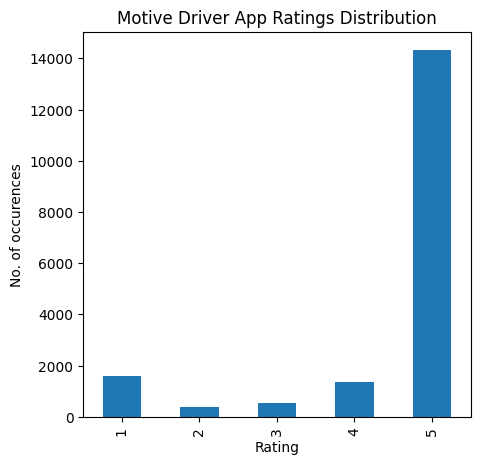

In [12]:
plt.figure(figsize=(5,5))
plt.title('Motive Driver App Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('No. of occurences')
data['rating'].value_counts().sort_index().plot(kind='bar')

In [13]:
pd.crosstab(data['rating'],data['source'])

source,App Store,Google Play
rating,,
1,277,1320
2,61,341
3,89,444
4,208,1159
5,2901,11420


Text(0, 0.5, '% of occurences')

<Figure size 500x500 with 0 Axes>

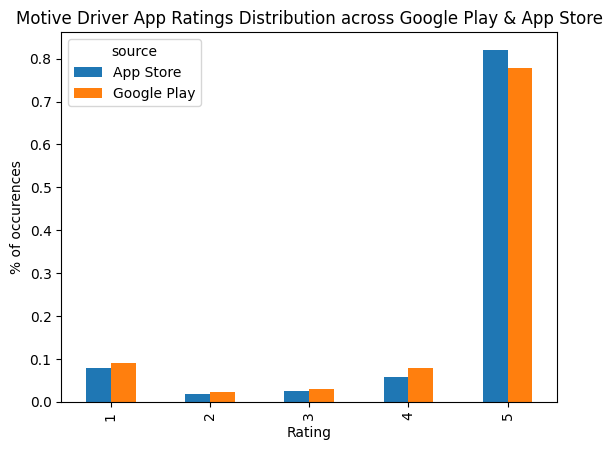

In [14]:
plt.figure(figsize=(5,5))
pd.crosstab(data['rating'],data['source'],normalize='columns').plot(kind='bar')
plt.title('Motive Driver App Ratings Distribution across Google Play & App Store')
plt.xlabel('Rating')
plt.ylabel('% of occurences')

<p> Obeservations - <br>
1. 78.6% of Motive DriverApp Customers has given 5 rating. <br>
2. 8.7% of Motive DriverApp customers has given 1 rating. <br>
3. Ratings distribution is almost same in both Google Play Store & App Store. 
</p>

<h3> Analysis of Source Column </h3>

In [15]:
#Source Distribution
data['source'].value_counts(normalize=True)

Google Play    0.805928
App Store      0.194072
Name: source, dtype: float64

(array([0, 1]), [Text(0, 0, 'Google Play'), Text(1, 0, 'App Store')])

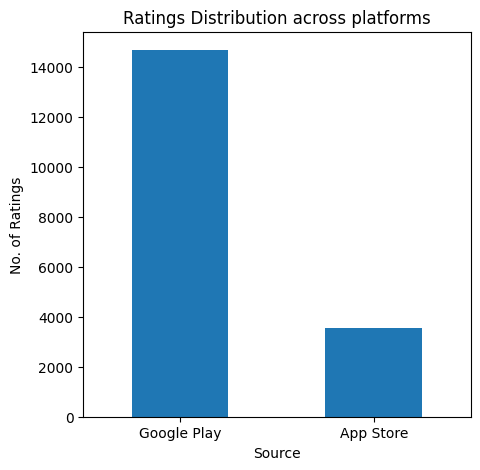

In [16]:
plt.figure(figsize=(5,5))
data['source'].value_counts().plot(kind='bar')
plt.title('Ratings Distribution across platforms')
plt.xlabel('Source')
plt.ylabel('No. of Ratings')
plt.xticks(rotation=0)

<h2> Data Cleaning </h2>

In [17]:
#Find no. of missing values in each column
data.isnull().sum().sort_values(ascending=False)

review_title               14684
developer_response_date     6393
developer_response          4902
review_description            15
source                         0
review_id                      0
user_name                      0
rating                         0
review_date                    0
dtype: int64

In [18]:
#Drop some columns which we don't need to do sentiment analysis of review
remove_cols = ['developer_response_date','developer_response','review_id','user_name','review_date','source']
data = data.drop(remove_cols,axis='columns')

In [19]:
#Drop review_title column as 80.5% values are null
data.drop('review_title',axis='columns',inplace=True)

In [20]:
data.shape

(18220, 2)

In [21]:
#Drop rows where review_description is null
data = data[data['review_description'].notna()]

In [22]:
data.shape

(18205, 2)

<h2> Reviews Analysis </h2>

In [25]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

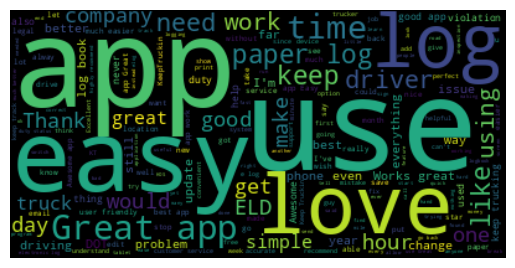

In [26]:
#Analysis of Review field
stopword = set(stopwords.words('english'))
text = " ".join(review for review in data.review_description)
wordcloud = WordCloud(stopwords=stopword).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
#Doing Analysis only for positive & negative sentiment. Hence removing 3 rating reviews.
data = data[data['rating'] != 3]

In [31]:
#Mapping +1 & -1 representing positive & negative sentiment respectively
data['sentiment'] = data['rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [32]:
data.head()

,review_description,rating,sentiment
0,"Great app, but the last update made the timers...",4,1
1,Stupid app is always disconnecting from the tr...,1,-1
2,This system is terrible. It constantly tells m...,1,-1
3,I'd give this negative stars if I could. This ...,1,-1
6,Less than one star! App constantly locks you i...,1,-1


In [33]:
#positive and negative sentiment:
positive = data[data['sentiment'] == 1]
negative = data[data['sentiment'] == -1]

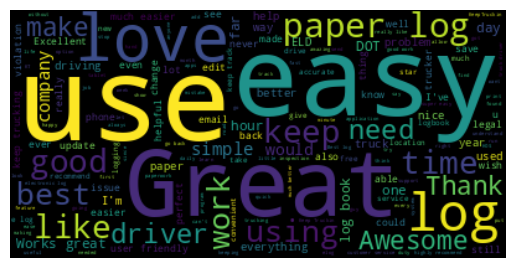

In [34]:
#Positive Sentiment
stopword = set(stopwords.words('english'))
stopword.update(["app","get"]) 
pos = " ".join(review for review in positive.review_description)
wordcloud = WordCloud(stopwords=stopword).generate(pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

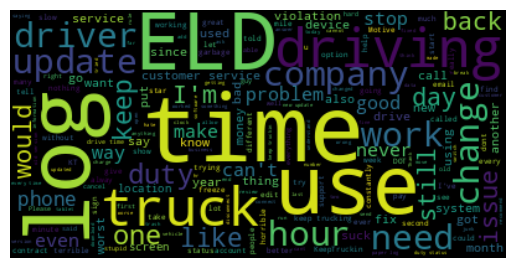

In [36]:
#Negative Sentiment
neg = " ".join(review for review in negative.review_description)
wordcloud = WordCloud(stopwords=stopword).generate(neg)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<h2> Build Sentiment Analysis Model </h2>

<h3> Text Blob </h3>

In [ ]:
data_textblob = data.copy()

In [ ]:
from textblob import TextBlob

In [ ]:
data_textblob['polarity'] = data_textblob['review_description'].apply(lambda review: TextBlob(review).sentiment.polarity)

In [ ]:
data_textblob.shape

(17672, 4)

In [ ]:
data_textblob.head()

,review_description,rating,sentiment,polarity
0,"Great app, but the last update made the timers...",4,1,0.149167
1,Stupid app is always disconnecting from the tr...,1,-1,-0.450000
2,This system is terrible. It constantly tells m...,1,-1,-0.054179
3,I'd give this negative stars if I could. This ...,1,-1,-0.177244
6,Less than one star! App constantly locks you i...,1,-1,0.090202


In [ ]:
#Mapping to positive & negative sentiment
text_blob_category = []
for polarity in data_textblob['polarity']:
  if polarity >= 0:
    text_blob_category.append(1)
  else:
    text_blob_category.append(-1)

In [ ]:
data_textblob['text_blob_category'] = text_blob_category

In [ ]:
data_textblob.head(15)

,review_description,rating,sentiment,polarity,text_blob_category
0,"Great app, but the last update made the timers...",4,1,0.149167,1
1,Stupid app is always disconnecting from the tr...,1,-1,-0.450000,-1
2,This system is terrible. It constantly tells m...,1,-1,-0.054179,-1
3,I'd give this negative stars if I could. This ...,1,-1,-0.177244,-1
6,Less than one star! App constantly locks you i...,1,-1,0.090202,1
7,"Use to be good, now runs very slow. Freeze's u...",1,-1,0.099048,1
8,Very sluggish. Press on a key (button) and it ...,1,-1,-0.350000,-1
10,This eld is horrible. It will get you in troub...,1,-1,-0.359259,-1
11,Not a good app. We've had multiple issues with...,1,-1,-0.240278,-1
12,Been using this app for a few years through my...,2,-1,-0.050000,-1


In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(data_textblob['sentiment'],data_textblob['text_blob_category'])

0.9059529198732458

In [ ]:
print(classification_report(data_textblob['sentiment'],data_textblob['text_blob_category']))

              precision    recall  f1-score   support

          -1       0.63      0.40      0.49      1999
           1       0.93      0.97      0.95     15673

    accuracy                           0.91     17672
   macro avg       0.78      0.69      0.72     17672
weighted avg       0.89      0.91      0.90     17672



Observation - Overall accuracy of model is 91%. Model is performing good for postive sentiment with f1-score of 95% but not able to identify negative sentiments properly with f1-score of only 49%

<h3> Vader </h3>

In [ ]:
data_vader = data.copy()

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj= SentimentIntensityAnalyzer()

In [ ]:
data_vader['compound'] = data_vader['review_description'].apply(lambda review: sid_obj.polarity_scores(review)['compound'])

In [ ]:
#Mapping to positive & negative sentiment
vader_category = []
for compound in data_vader['compound']:
  if compound >= 0:
    vader_category.append(1)
  else:
    vader_category.append(-1)
data_vader['vader_category'] = vader_category

In [ ]:
data_vader.head()

,review_description,rating,sentiment,compound,vader_category
0,"Great app, but the last update made the timers...",4,1,0.9814,1
1,Stupid app is always disconnecting from the tr...,1,-1,-0.8750,-1
2,This system is terrible. It constantly tells m...,1,-1,-0.3172,-1
3,I'd give this negative stars if I could. This ...,1,-1,-0.8507,-1
6,Less than one star! App constantly locks you i...,1,-1,0.5176,1


In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(data_vader['sentiment'],data_vader['vader_category']))

              precision    recall  f1-score   support

          -1       0.68      0.56      0.62      1999
           1       0.95      0.97      0.96     15673

    accuracy                           0.92     17672
   macro avg       0.81      0.77      0.79     17672
weighted avg       0.92      0.92      0.92     17672



Observation - With Vader, negative sentiments f1-score is improved to 62% from 49%. Overall accuracy is 92%. 

<h4> Bag of Word Vectorization </h4>

In [52]:
data_bow = data.copy()

In [53]:
data_bow.head()

,review_description,rating,sentiment
0,"Great app, but the last update made the timers...",4,1
1,Stupid app is always disconnecting from the tr...,1,-1
2,This system is terrible. It constantly tells m...,1,-1
3,I'd give this negative stars if I could. This ...,1,-1
6,Less than one star! App constantly locks you i...,1,-1


In [ ]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(data_bow['review_description'])

In [55]:
text_counts

<17672x8574 sparse matrix of type '<class 'numpy.int64'>'
	with 145646 stored elements in Compressed Sparse Row format>

In [56]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, 
                                                  data_bow['sentiment'], 
                                                  test_size=0.15, 
                                                  random_state=17, 
                                                  stratify=data_bow[['sentiment']])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15021, 8574)
(2651, 8574)
(15021,)
(2651,)


In [57]:
#Training the model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

MultinomialNB()

In [58]:
#Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print("Accuracuy Score: ",accuracy_score)

Accuracuy Score:  0.936627687665032


In [59]:
print(metrics.classification_report(predicted, y_test))

              precision    recall  f1-score   support

          -1       0.68      0.74      0.71       276
           1       0.97      0.96      0.96      2375

    accuracy                           0.94      2651
   macro avg       0.82      0.85      0.84      2651
weighted avg       0.94      0.94      0.94      2651



Observation - With Bag of Words Vectorization, negative sentiments f1-score is improved to 71% from 62%. Overall accuracy of the model is 94%. 